In [1]:
import pandas as pd

rfm = pd.read_csv("../data/processed/customer_segments.csv")
rfm.head()

,Unnamed: 0,CustomerID,Recency,Frequency,Monetary,cluster
0,0,12346.0,326,1,77183.60,0
1,1,12347.0,2,7,4310.00,3
2,2,12348.0,75,4,1797.24,3
3,3,12349.0,19,1,1757.55,3
4,4,12350.0,310,1,334.40,1


In [2]:
cluster_profile = rfm.groupby("cluster").agg({
    "Recency":["mean","median"],
    "Frequency": ["mean","median"],
    "Monetary" : ["mean","median"],
    "CustomerID" : "count"
})

cluster_profile

Recency         Frequency              Monetary              \
               mean median       mean median           mean      median   
cluster                                                                   
0         15.672986    5.0  22.047393   19.0   12453.225924    7857.100   
1        248.564030  243.0   1.551789    1.0     478.107581     309.925   
2          7.384615    2.0  82.692308   63.0  127338.313846  117379.630   
3         43.910580   33.0   3.655748    3.0    1349.698298     825.800   

        CustomerID  
             count  
cluster             
0              211  
1             1062  
2               13  
3             3053

## Combined meaning (Why rfm works)
The **power pf RFM** comes from **combining all three*:

| Scenario | Interpretation |
|----------|----------------|
| Low Recency + High Frequency + High Monetary | 💎 **Loyal High-Value** |
| High Recency + Low Frequency + Low Monetary | ⚠️ **Churn Risk** |
| Low Recency + Low Frequency + Medium Monetary | 🌱 **Potential Loyalist** |
| Medium Recency + Medium Frequency + Medium Monetary | 🛒 **Occasional Buyer** |


*Table : Customer Behaviour interpretation using RFM metrics*

In [3]:
cluster_profile.columns = {
    "Recency_Mean","Recency_Median","Frequency_Mean","Frequency_Median","Monetary_Mean","Monetary_Median",
    "Customer_Count"
}
cluster_profile

,Frequency_Median,Customer_Count,Frequency_Mean,Recency_Mean,Monetary_Median,Recency_Median,Monetary_Mean
cluster,,,,,,,
0,15.672986,5.0,22.047393,19.0,12453.225924,7857.100,211
1,248.564030,243.0,1.551789,1.0,478.107581,309.925,1062
2,7.384615,2.0,82.692308,63.0,127338.313846,117379.630,13
3,43.910580,33.0,3.655748,3.0,1349.698298,825.800,3053


In [4]:
rfm.sample(5)

,Unnamed: 0,CustomerID,Recency,Frequency,Monetary,cluster
3252,3252,16777.0,80,2,226.35,3
330,330,12753.0,23,6,21429.39,3
2985,2985,16413.0,57,1,262.20,3
139,139,12520.0,79,5,2634.26,3
4328,4328,18272.0,3,6,3078.58,3


In [5]:
cluster_labels = {
    0 : "Loyal High-Value",
    1 : "Churn Risk",
    2 : "Occasional Buyers",
    3 : "Potential Loyalists"
}

rfm['CustomerSegment'] = rfm['cluster'].map(cluster_labels)
rfm.head()

,Unnamed: 0,CustomerID,Recency,Frequency,Monetary,cluster,CustomerSegment
0,0,12346.0,326,1,77183.60,0,Loyal High-Value
1,1,12347.0,2,7,4310.00,3,Potential Loyalists
2,2,12348.0,75,4,1797.24,3,Potential Loyalists
3,3,12349.0,19,1,1757.55,3,Potential Loyalists
4,4,12350.0,310,1,334.40,1,Churn Risk


In [6]:
rfm = rfm.drop(columns=["Unnamed: 0"])

In [7]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,cluster,CustomerSegment
0,12346.0,326,1,77183.60,0,Loyal High-Value
1,12347.0,2,7,4310.00,3,Potential Loyalists
2,12348.0,75,4,1797.24,3,Potential Loyalists
3,12349.0,19,1,1757.55,3,Potential Loyalists
4,12350.0,310,1,334.40,1,Churn Risk


In [8]:
rfm['CustomerSegment'].value_counts()

CustomerSegment
Potential Loyalists    3053
Churn Risk             1062
Loyal High-Value        211
Occasional Buyers        13
Name: count, dtype: int64

## Business Actions per Segment
### Loyal High-Value
- loyal rewards, VIP offers, Early access
### Potential Loyalists
- Personalized discounts, nudges, reminders
### Occasional Buyers
- Cross-sell , product recommendations
### Churn Risk
- Win-Back campaigns , heavy discounts

In [10]:
rfm.to_csv("../data/processed/customer_business_segments.csv",index = False)

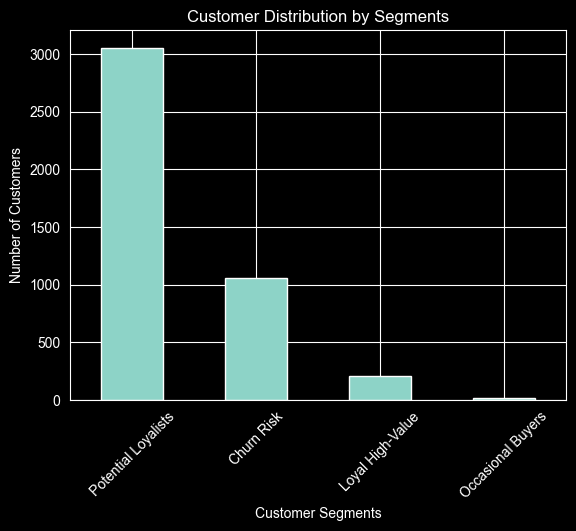

In [10]:
import matplotlib.pyplot as plt
#Customer Distribution by Segment
segment_counts = rfm['CustomerSegment'].value_counts()

plt.figure()
segment_counts.plot(kind="bar")
plt.title("Customer Distribution by Segments")
plt.xlabel("Customer Segments")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

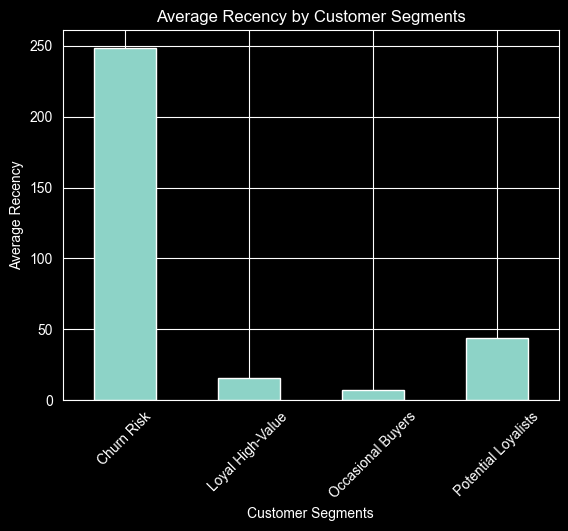

In [11]:
# Average recency by segment
rfm.groupby("CustomerSegment")["Recency"].mean().plot(kind="bar")
plt.title("Average Recency by Customer Segments")
plt.xlabel("Customer Segments")
plt.ylabel("Average Recency")
plt.xticks(rotation=45)
plt.show()

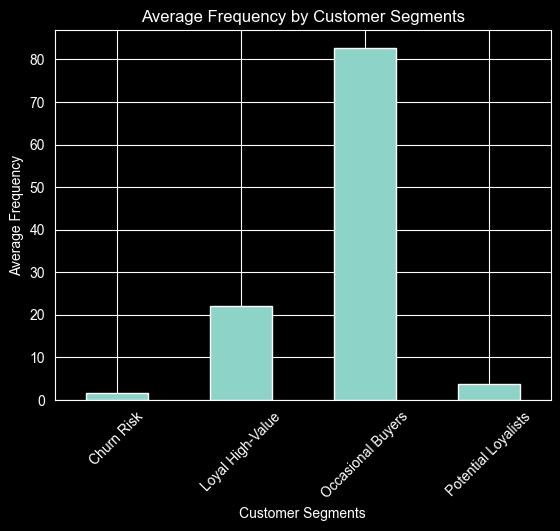

In [12]:
#Average frequency
rfm.groupby("CustomerSegment")["Frequency"].mean().plot(kind="bar")
plt.title("Average Frequency by Customer Segments")
plt.xlabel("Customer Segments")
plt.ylabel("Average Frequency")
plt.xticks(rotation=45)
plt.show()

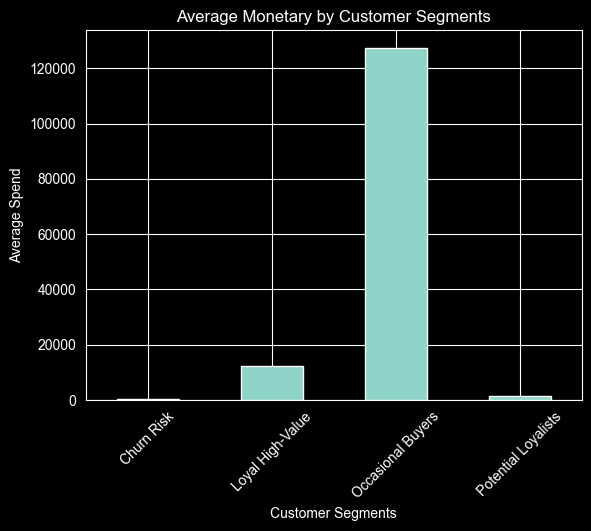

In [16]:
rfm.groupby("CustomerSegment")["Monetary"].mean().plot(kind="bar")
plt.title("Average Monetary by Customer Segments")
plt.xlabel("Customer Segments")
plt.ylabel("Average Spend")
plt.xticks(rotation=45)
plt.show()